**Edge Detection**

After reading <a href="https://github.com/Anurag-Gade/OpenCV-Notes/blob/main/Object_Detection_(Part_1).ipynb">Object Detection (Part 1)</a>, the meanings of the terms "edge" and "corner" with respect to Computer Vision could be understood. Similar to corners, even edges have algorithms for their detection. We have:

1)Canny Edge Detection

2)Sobel Edge Detection



In Canny Edge Detection, we first apply the Gaussian filter, to smoothen-out the image. Smoothening out the image removes the unwanted noise from the image. In technical terms, us smoothening out the image, implies we are convolving the Gaussian filter with the image.

For reference, below is the formula for the Gaussian filter kernel of size (2k+1)×(2k+1).
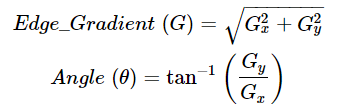

We use a Gaussian filter of size 5x5.

Then, using a Sobel filter, in the horizontal and vertical directions, we get the first derivative in horizontal and vertical directions. Then, the Intensity Gradient can be found out.

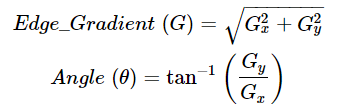

Here, Gx and Gy are the first derivatives in the horizontal and vertical directions.

After finding the gradient, Non-Max Supresssion is applied to remove the false responses of edge detection. Non-max suppression is used mainly in object detection. For more theory on non-max suppression, go to this link: https://whatdhack.medium.com/reflections-on-non-maximum-suppression-nms-d2fce148ef0a

In this, every pixel is checked if it is a local maxima, in the direction of the gradient, in it's neighbourhood.

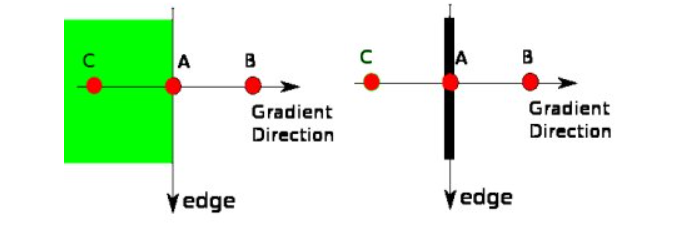

The result which is obtained is a binary image, with "thin edges".

After this, double threshold is applied to find out the potential edges.

Finally hysteresis thresholding is applied, to finalize the edge detection, by suppressing the weak edges, and which are not connected to the strong edges. For this, we need two threshold values: minVal, and maxVal. The edges with intensity gradient greater than maxVal, are "sure-edges". The edges with the intensity gradient below minVal, are not edges, and discarded. For the edges, in between the two regions, are classified based on their connectivity. Let us see it through an example:

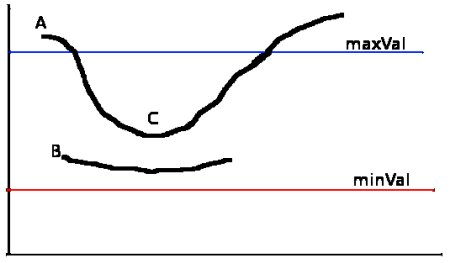

Edge A is a "sure-edge", as its intensity gradient is above the maxVal. B is above minVal, but is not connected to any sure-edge. Hence, it is not an edge and it is discarded. C, is an edge, as despite of it being in between the two regions, it is still connected to edge A which is a sure edge.

For high-resolution images, where you need only the noraml edges, it is a good idea to apply a blur before applying cv2.Canny.

The syntax for Canny Edge Detector in OpenCV, is cv2.Canny(img,threshold1,threshold2).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
img = cv2.imread('C:/Users/email/OneDrive/Pictures/elephant_img.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 

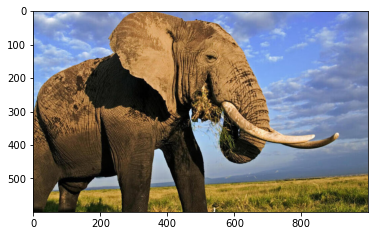

In [19]:
plt.imshow(img) 

In [20]:
edges = cv2.Canny(img,threshold1=127,threshold2=127) #Reason of keeping the thresholds as 127 is that it is in the middle of the maximum and minimum value of the pixels (0-255). 

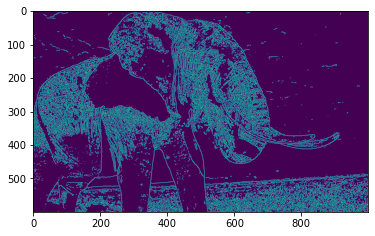

In [21]:
plt.imshow(edges) 

One can observe that there's a lot of unnecessary noise in the image. To remove this noise, we can tinker with the threshold values, or apply a blur. Here's the way you can find out the optimum thresholds for a better detection.

In [23]:
#Median value of pixel
median_value = np.median(img) 
median_value

119.0

In [24]:
#SETTING THE LOWER THRESHOLD TO THE MAXIMUM OF 0 OR 70% OF THE MEDIAN VALUE
lower = int(max(0,0.7*median_value))
#SETTING THE UPPER THRESHOLD TO THE MINIMUM OF 255 OR 130% OF THE MEDIAN VALUE
upper = int(min(255,1.3*median_value)) 

In [25]:
edges = cv2.Canny(img,threshold1=lower,threshold2=upper) 

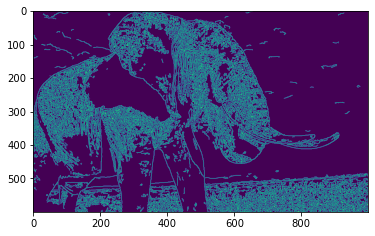

In [26]:
plt.imshow(edges) 

We can see that there is a considerable improvement, but blurring the images will help.

In [27]:
blurred_img = cv2.blur(img,(5,5)) #Using a 5x5 blurring Kernel.

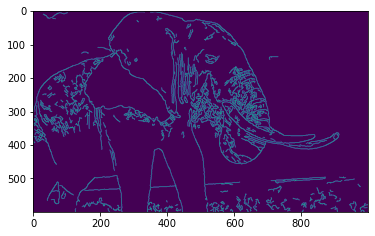

In [29]:
edges = cv2.Canny(blurred_img,threshold1=lower,threshold2=upper) 
plt.imshow(edges) 

Now this is a much better one! :)

**Grid Detection**

Cameras usually create distortions in an image. To account for these distortions, when performing tasks like object tracking is to have a recognizable pattern attached to the object being tracked.

For this purpose, Grid patterns are used for the calibration of cameras, and for motion tracking.

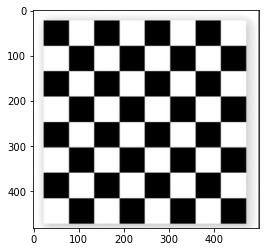

In [3]:
grid_img = cv2.imread('C:/Users/email/OneDrive/Pictures/Grid_Img.jpg')
plt.imshow(grid_img) 

We use the cv2.findChessboardCorners(image,patternSize). The parameter patternSize is for the inner points.

In [4]:
found, corners = cv2.findChessboardCorners(grid_img,(7,7)) 
#found tells us that if it has found chessboard type corners. It returns True or False

In [5]:
corners

array([[[ 79.21305 ,  78.73498 ]],

       [[134.84389 ,  78.7169  ]],

       [[191.04984 ,  78.709206]],

       [[246.56564 ,  78.71239 ]],

       [[303.12302 ,  78.75074 ]],

       [[359.3369  ,  78.82068 ]],

       [[415.23123 ,  78.72369 ]],

       [[ 79.15392 , 134.55113 ]],

       [[134.8335  , 134.55289 ]],

       [[191.18501 , 134.57747 ]],

       [[246.55406 , 134.5593  ]],

       [[303.0621  , 134.55907 ]],

       [[359.38358 , 134.5724  ]],

       [[415.2517  , 134.57372 ]],

       [[ 79.22242 , 190.71786 ]],

       [[134.79129 , 190.7008  ]],

       [[191.04047 , 190.76259 ]],

       [[246.59415 , 190.66797 ]],

       [[303.05957 , 190.72739 ]],

       [[359.37567 , 190.73784 ]],

       [[415.22937 , 190.73889 ]],

       [[ 79.22515 , 247.31552 ]],

       [[134.84383 , 247.32687 ]],

       [[191.16643 , 247.32173 ]],

       [[246.598   , 247.29292 ]],

       [[303.14145 , 247.28279 ]],

       [[359.38892 , 247.28403 ]],

       [[415.2688  , 247.279

In [7]:
cv2.drawChessboardCorners(grid_img,(7,7),corners,found)  #This complements cv2.findChessboardCorners() 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [255, 255, 255],
        [  8,   8,   8]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [255, 255, 255],
        [  8,   8,   8]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [255, 255, 255],
        [  8,   8,   8]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [255, 255, 255],
        [  8,   8,   8]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [251, 251, 251],
        [255, 255, 255],
        [  8,   8,   8]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [251, 251, 251],
        [255, 255, 255],
        [  8,   8,   8]]

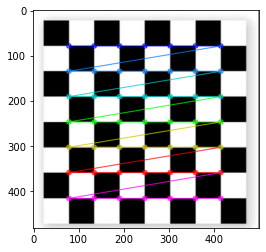

In [8]:
plt.imshow(grid_img) 

In [9]:
dots_grid = cv2.imread('C:/Users/email/OneDrive/Pictures/Dots_Grid.jpg')

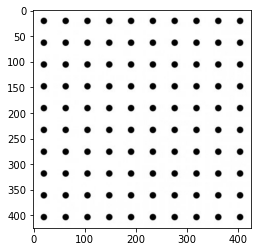

In [10]:
plt.imshow(dots_grid) 

Similarly, we use cv2.findCirclesGrid(img,pattern_size,flags). 

In [11]:
found,corners = cv2.findCirclesGrid(dots_grid,(10,10),cv2.CALIB_CB_SYMMETRIC_GRID) 

CALIB_CB_SYMMETRIC_GRID uses symmetric pattern of circles.

CALIB_CB_ASYMMETRIC_GRID uses asymmetric pattern of circles.

CALIB_CB_CLUSTERING uses a special algorithm for grid detection. It is more robust to perspective distortions but much more sensitive to background clutter.

In [12]:
found

True

In [13]:
corners

array([[[ 20.744423,  20.746004]],

       [[ 63.26948 ,  20.733843]],

       [[105.74928 ,  20.74079 ]],

       [[148.2547  ,  20.745478]],

       [[190.73524 ,  20.742338]],

       [[233.2624  ,  20.735477]],

       [[275.7524  ,  20.748007]],

       [[318.2515  ,  20.734766]],

       [[360.74472 ,  20.731936]],

       [[403.2477  ,  20.742153]],

       [[ 20.751266,  63.25843 ]],

       [[ 63.25083 ,  63.274   ]],

       [[105.74    ,  63.26527 ]],

       [[148.24881 ,  63.24974 ]],

       [[190.7444  ,  63.250313]],

       [[233.2738  ,  63.26517 ]],

       [[275.7473  ,  63.26333 ]],

       [[318.27203 ,  63.26655 ]],

       [[360.729   ,  63.270866]],

       [[403.2478  ,  63.2662  ]],

       [[ 20.746054, 105.74478 ]],

       [[ 63.264446, 105.73681 ]],

       [[105.73534 , 105.73885 ]],

       [[148.24889 , 105.75356 ]],

       [[190.74371 , 105.74179 ]],

       [[233.27054 , 105.73121 ]],

       [[275.74673 , 105.73683 ]],

       [[318.25797 , 105.752

In [14]:
cv2.drawChessboardCorners(dots_grid,(10,10),corners,found) 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

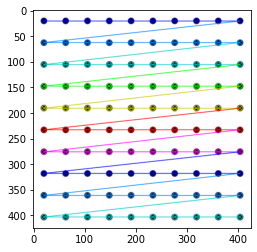

In [16]:
plt.imshow(dots_grid)

**Contour Detection**

Contours are curves joining all the continuous points that are along the boundary, and having the same color or intensity. These are very useful tools for object detection. We read it in as a grayscale image.

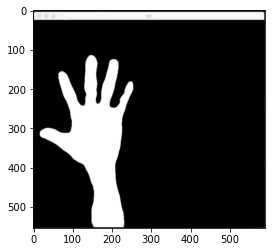

In [21]:
contour_img = cv2.imread('C:/Users/email/OneDrive/Pictures/Hand.png')  
plt.imshow(contour_img) 

In [27]:
contour_img

array([[27, 27, 27, ..., 30, 30, 30],
       [27, 28, 28, ..., 30, 28, 29],
       [26, 28, 29, ..., 28, 28, 29],
       ...,
       [13, 18, 22, ..., 18, 23, 24],
       [20, 23, 25, ..., 23, 24, 25],
       [25, 26, 27, ..., 24, 25, 26]], dtype=uint8)

**TO BE UPDATED**